# 1、近似算法

## 1.1 分段聚合近似 PAA  
  
pyts.approximation.PiecewiseAggregateApproximation

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.approximation import PiecewiseAggregateApproximation
from pyts.utils import segmentation
import pandas as pd
%matplotlib inline

In [14]:
# PAA
n_samples, n_timestamps = 2, 10

rng = np.random.RandomState(41)
X = rng.randn(n_samples, n_timestamps)
print(X)

windows_size = 2
paa = PiecewiseAggregateApproximation(window_size=windows_size)
X_paa = paa.transform(X)
print(X_paa)

seg = segmentation(10, window_size=3, overlapping=False)
print(seg)

[[-0.27071232  0.10484805  0.25052782 -0.92519997  0.56714366 -1.04018022
  -0.15367595  0.78985181 -1.22621585 -0.94800699]
 [-0.56965394 -0.97715021 -0.77063171 -0.03371129 -1.03285925  1.14242738
  -0.60977801  1.46941639  1.49267884  0.70712523]]
[[-0.08293214 -0.33733607 -0.23651828  0.31808793 -1.08711142]
 [-0.77340208 -0.4021715   0.05478407  0.42981919  1.09990203]]
(array([0, 2, 5, 7], dtype=int64), array([ 2,  5,  7, 10], dtype=int64), 4)


## 1.2 符号聚合近似 SAX  
Symbolic Aggregate approXimation

In [5]:
from pyts.approximation import SymbolicAggregateApproximation
X = [[0, 4, 2, 1, 7, 6, 3, 5], [2, 5, 4, 5, 3, 4, 2, 3]]
sax = SymbolicAggregateApproximation()
print(sax.transform(X))

[['a' 'c' 'b' 'a' 'd' 'd' 'b' 'c']
 ['a' 'd' 'c' 'd' 'b' 'c' 'a' 'b']]


示例：

In [6]:
import numpy as np
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from scipy.stats import norm
from pyts.approximation import SymbolicAggregateApproximation

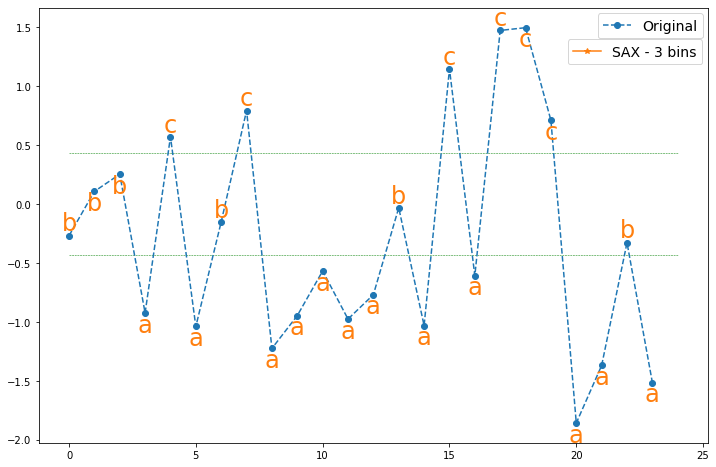

In [9]:
n_samples, n_timestamps = 100, 24
rng = np.random.RandomState(41)
X = rng.randn(n_samples, n_timestamps)

n_bins = 3
sax = SymbolicAggregateApproximation(n_bins=n_bins, strategy='normal')
X_sax = sax.fit_transform(X)

bins = norm.ppf(np.linspace(0, 1, n_bins+1)[1:-1])

# Show the results for the first time series
bottom_bool = np.r_[True, X_sax[0, 1:] > X_sax[0, :-1]]

plt.figure(figsize=(12, 8))
plt.plot(X[0], 'o--', label='Original')
for x, y, s, bottom in zip(range(n_timestamps), X[0], X_sax[0], bottom_bool):
    va = 'bottom' if bottom else 'top'
    plt.text(x, y, s, ha='center', va=va, fontsize=24, color='#ff7f0e')
plt.hlines(bins, 0, n_timestamps, color='g', linestyles='--', linewidth=0.5)
sax_legend = mlines.Line2D([], [], color='#ff7f0e', marker='*',
                           label='SAX - {0} bins'.format(n_bins))
first_legend = plt.legend(handles=[sax_legend], fontsize=14, loc=(0.79, 0.87))
ax = plt.gca().add_artist(first_legend)
plt.legend(loc=(0.835, 0.93), fontsize=14)
plt.show()

## 1.3 离散傅里叶变换 DFT  
Discrete Fourier Transform.

In [16]:
from pyts.approximation import DiscreteFourierTransform
from datasets import load_gunpoint

In [17]:
X, _, _, _ = load_gunpoint(return_X_y=True)
transformer = DiscreteFourierTransform(n_coefs=4)
X_new = transformer.fit_transform(X)
X_new.shape

(50, 4)

In [18]:
X.shape

(50, 150)